In [2]:
import pandas as pd
import numpy as np

import glob
import xarray as xr

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing 

from sklearn.linear_model import LinearRegression

from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.utils.plotting import plot_series

import seaborn as sns

from standard_precip.spi import SPI
from standard_precip.utils import plot_index

import geopandas as gpd

from shapely.geometry import Point

from scipy.interpolate import Rbf

from pykrige.ok import OrdinaryKriging

import skgstat as skg

In [29]:
#load df
feature_df = pd.read_csv('../data/almost_final_final_df.csv', header=0, index_col = 0)
feature_df.head(5)

feature_df.rename(columns={'Soil Zone': 'soil_zone'}, inplace=True)

,Canola,region,average_max_temp_in_4,average_max_temp_in_5,average_max_temp_in_6,average_max_temp_in_7,average_max_temp_in_8,average_max_temp_in_9,average_max_temp_in_10,days_above_25,...,SPI_in_6,SPI_in_7,SPI_in_8,SPI_in_9,SPI_in_10,Region,Soil Zone,Latitude,Longitude,region_aggregate
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.127132,1,284.965759,290.526489,297.082458,299.412781,300.752075,296.791382,286.036377,72,...,0.115236,0.209242,0.256968,0.171961,-0.032910,1,1,49.154052,-101.479393,Southeastern
1991,2.520378,1,287.648346,291.984650,296.854401,297.652344,299.938751,292.543549,282.321960,51,...,0.195163,0.282696,0.222439,0.398697,0.232995,1,1,49.154052,-101.479393,Southeastern
1992,-6.339489,1,283.242584,293.701874,295.445709,294.548126,297.033264,292.229004,285.503967,37,...,-0.188189,0.358708,0.309846,0.225539,-0.114548,1,1,49.154052,-101.479393,Southeastern
1993,4.147971,1,284.697113,292.762695,293.425385,294.037415,296.177429,291.031281,284.688232,26,...,0.086120,0.608185,0.263007,0.235375,-0.044934,1,1,49.154052,-101.479393,Southeastern
1994,2.081733,1,285.144440,293.432678,294.774536,297.061951,297.072021,294.903839,286.052094,38,...,0.446020,0.102491,0.320304,0.034789,0.322164,1,1,49.154052,-101.479393,Southeastern


C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


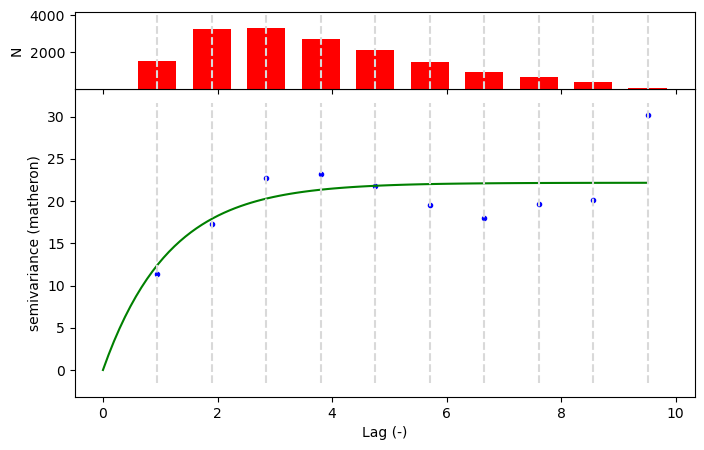

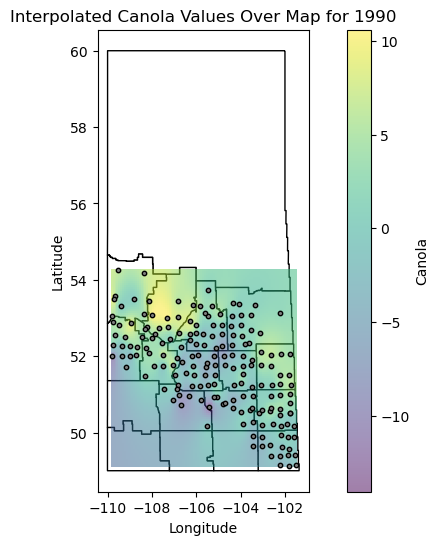

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


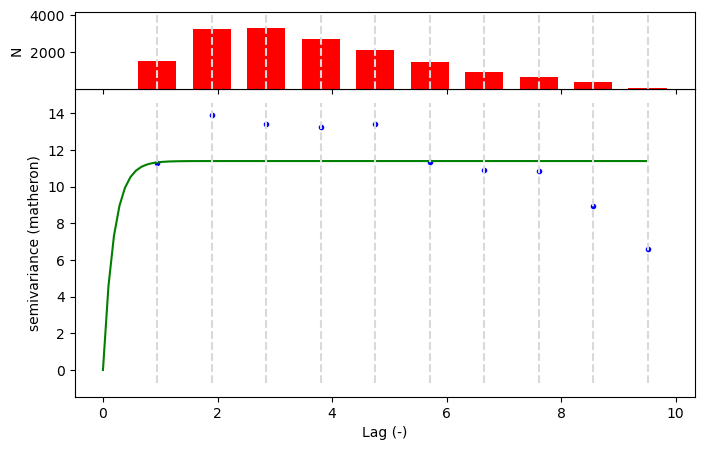

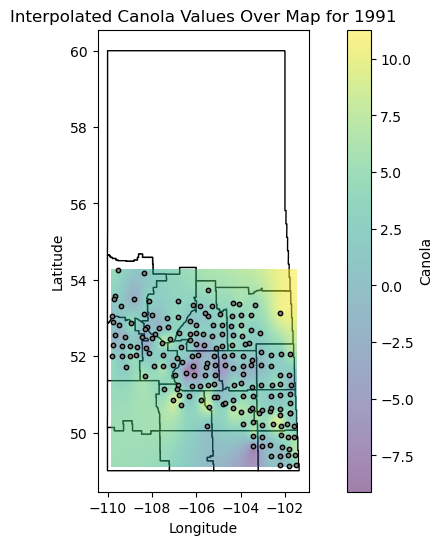

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


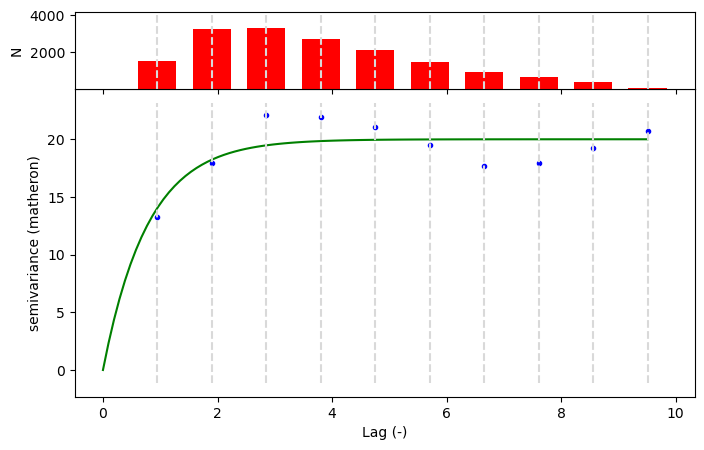

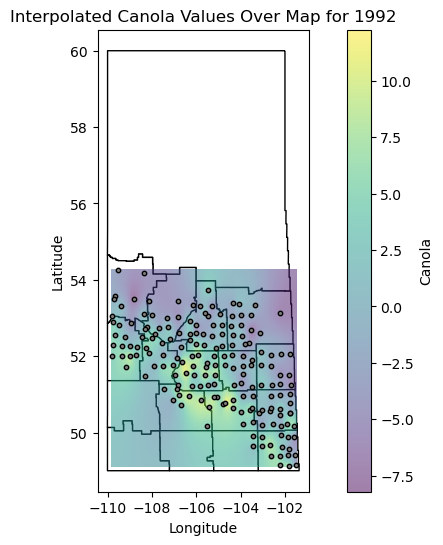

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


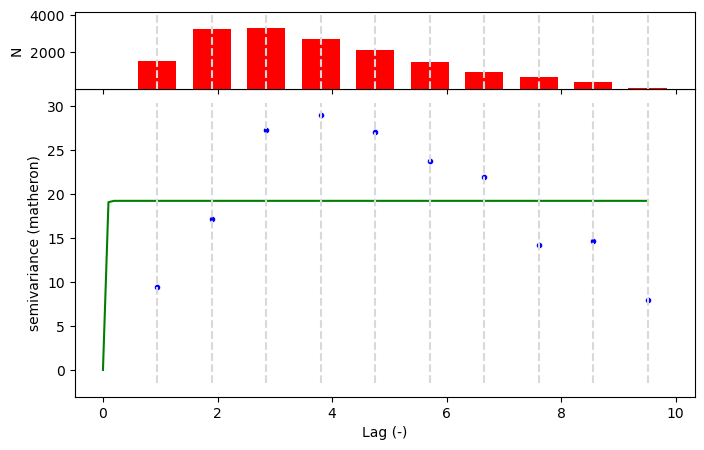

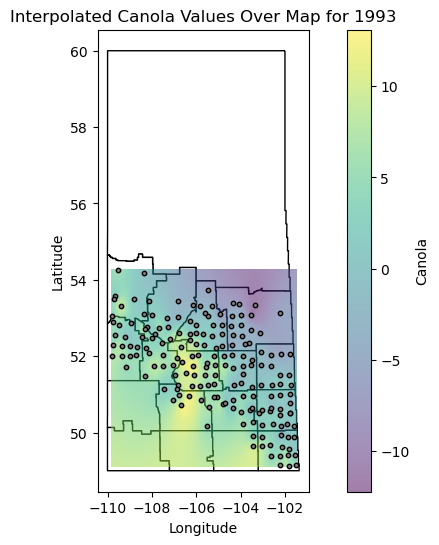

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


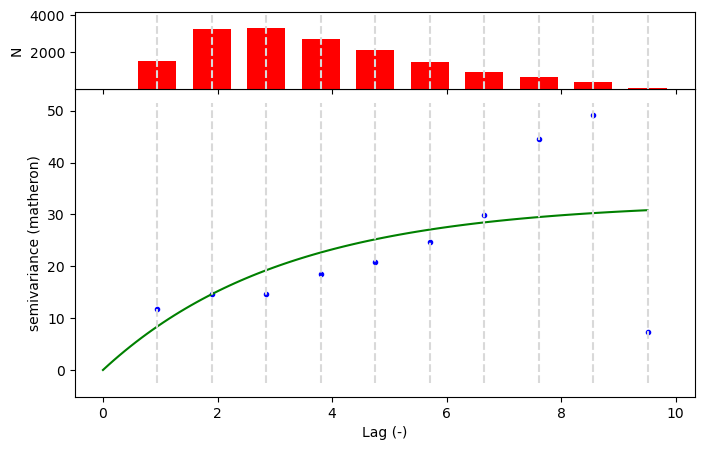

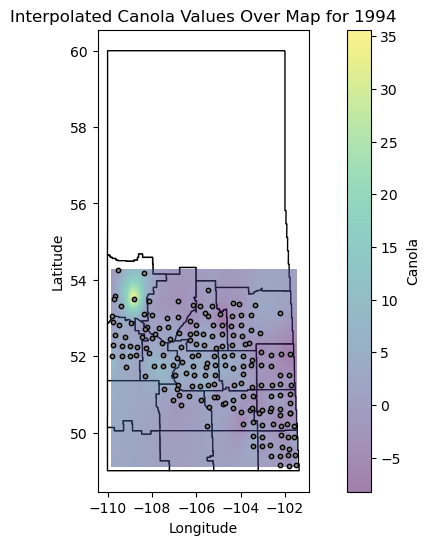

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


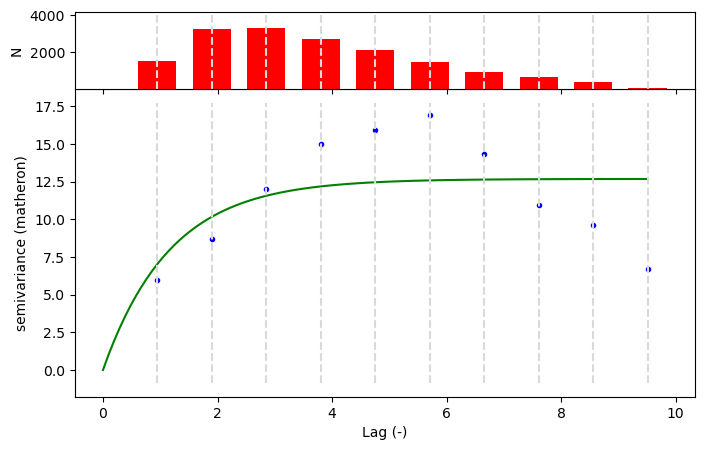

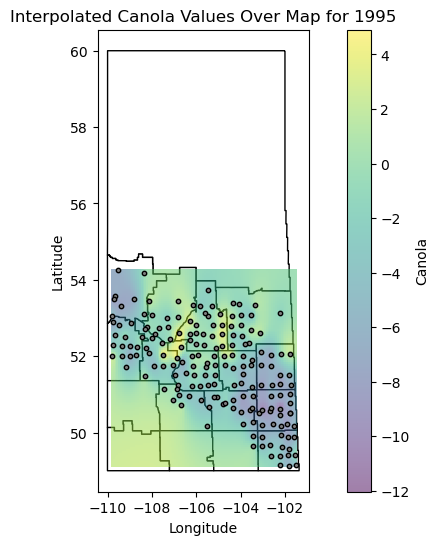

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


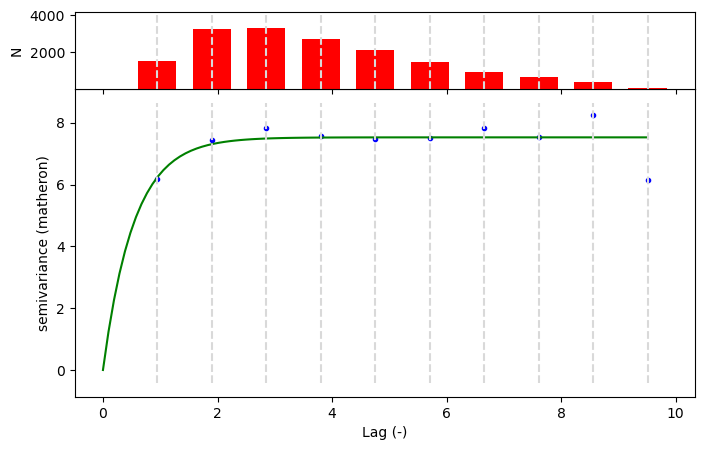

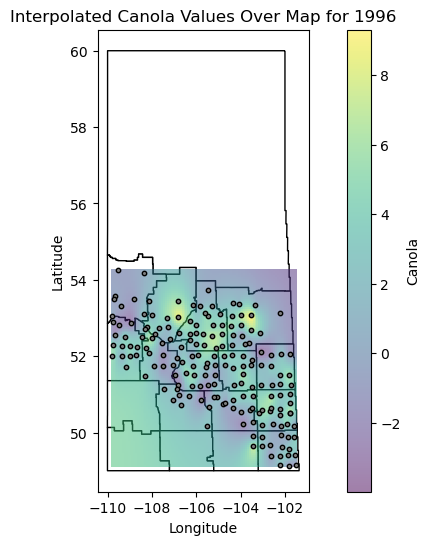

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


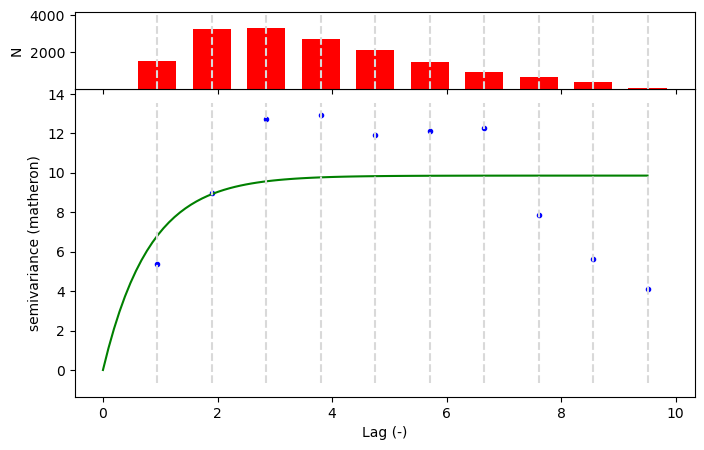

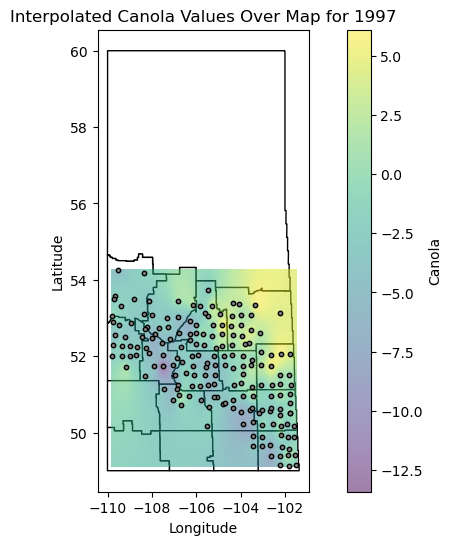

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


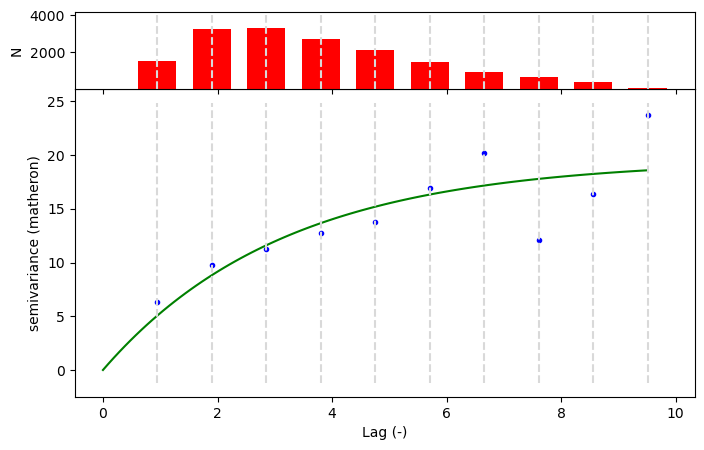

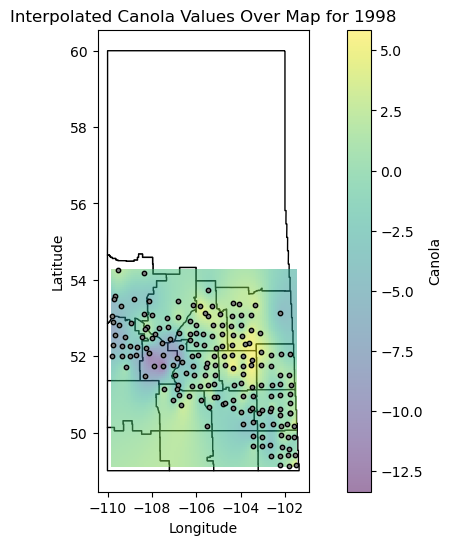

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


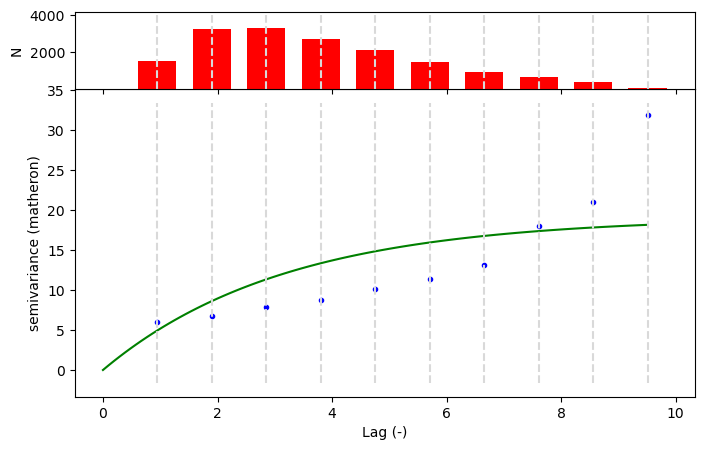

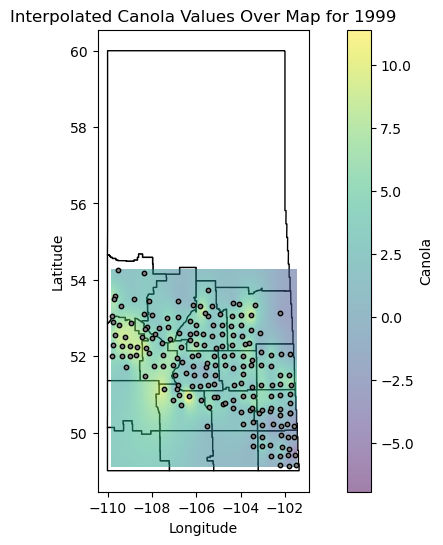

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


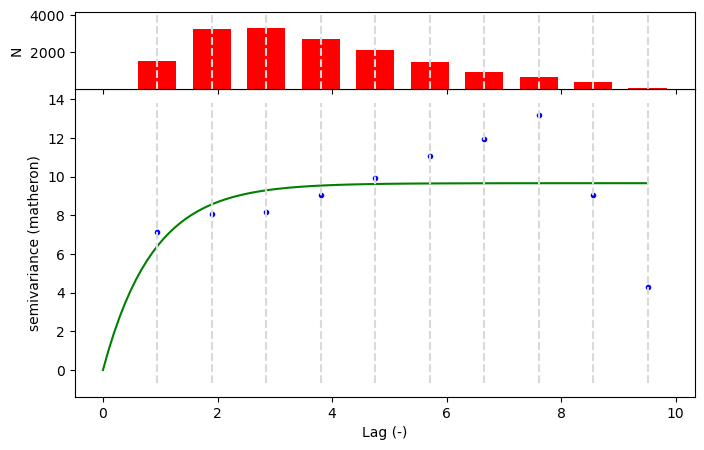

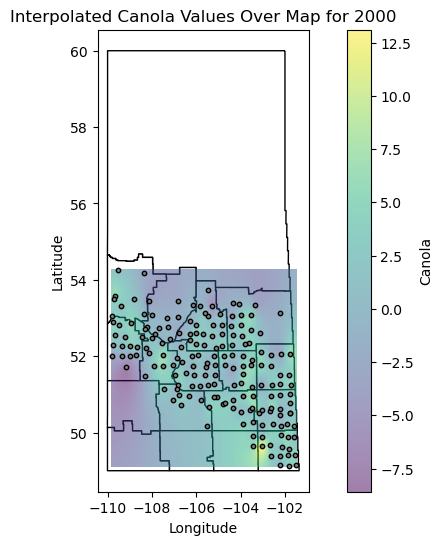

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


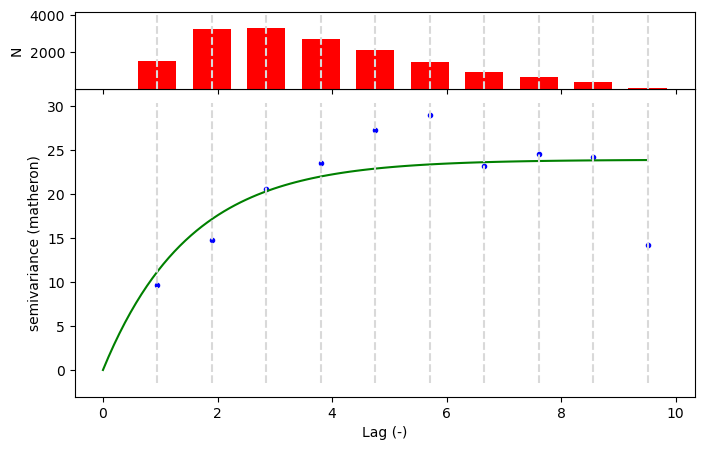

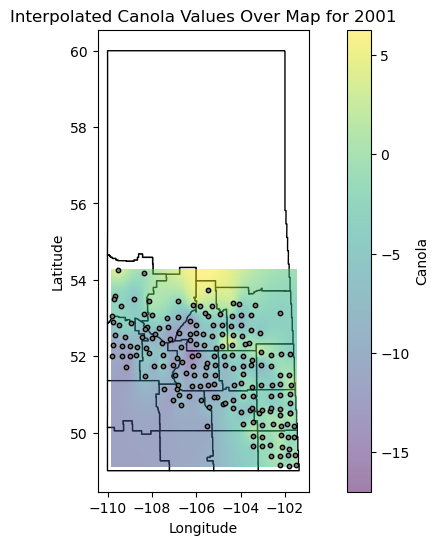

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


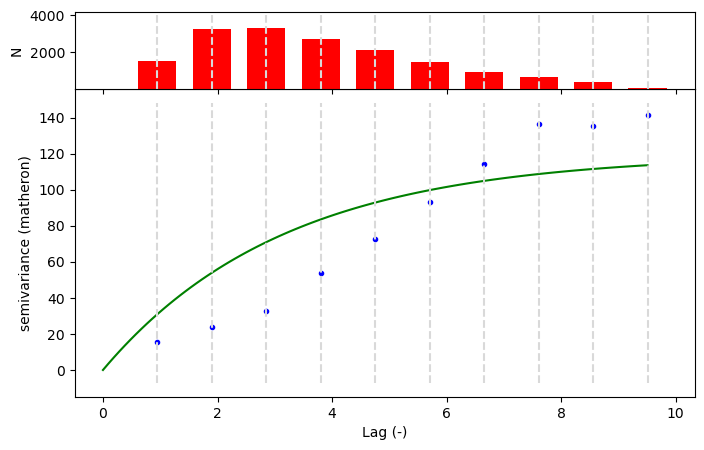

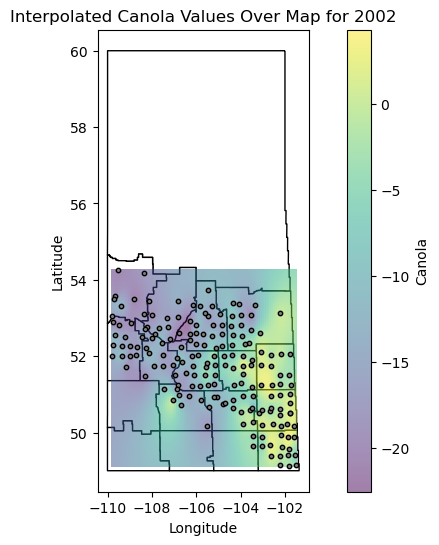

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


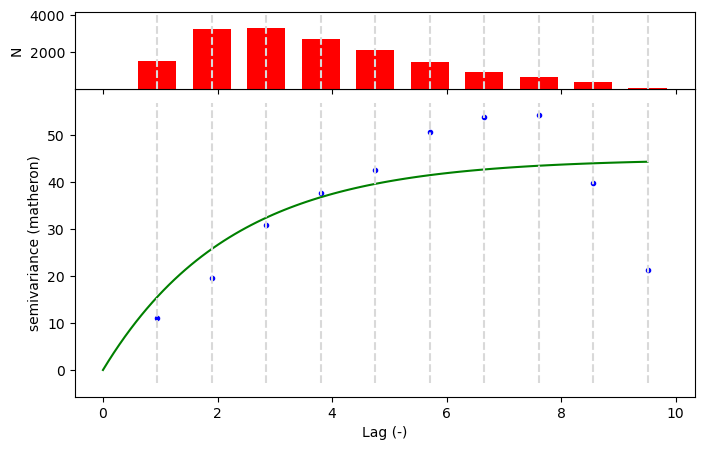

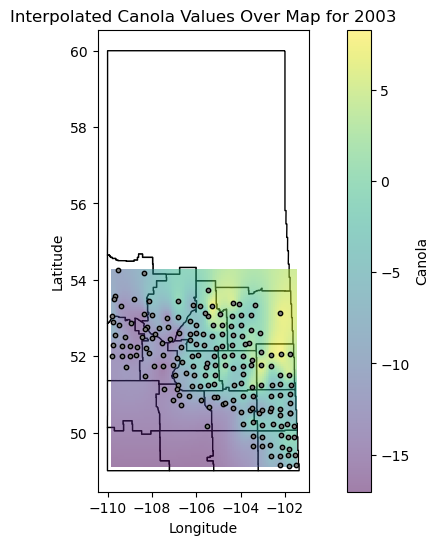

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


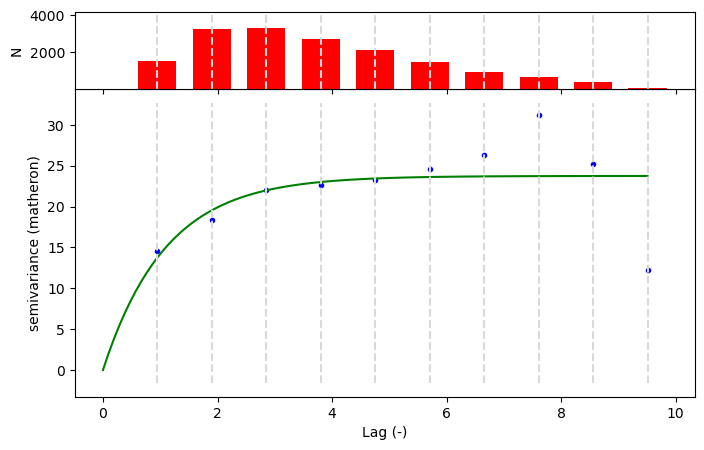

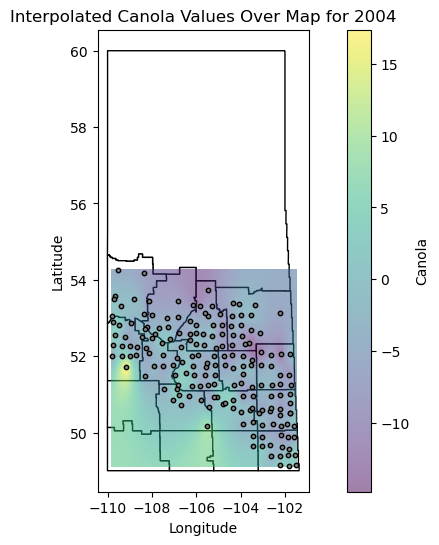

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


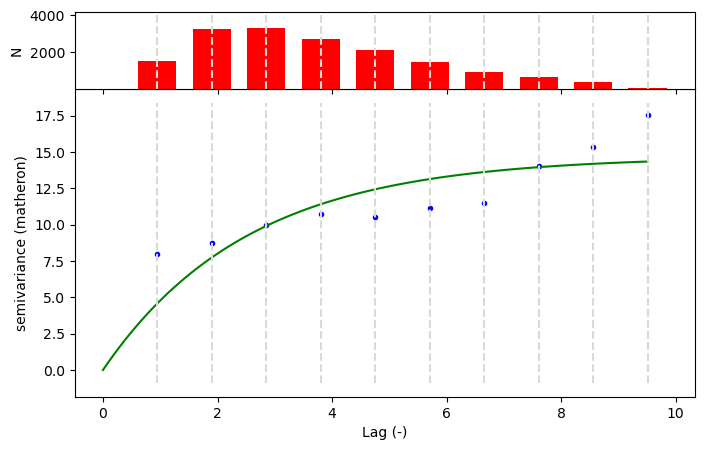

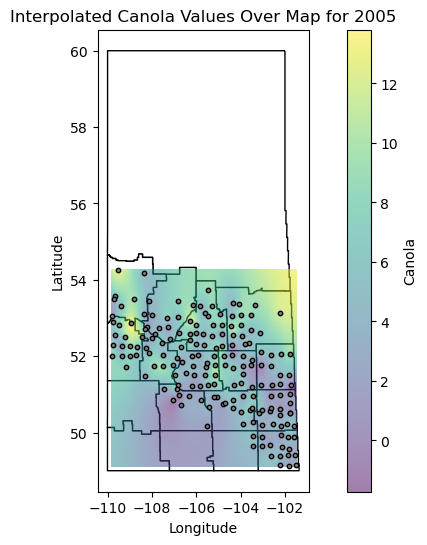

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


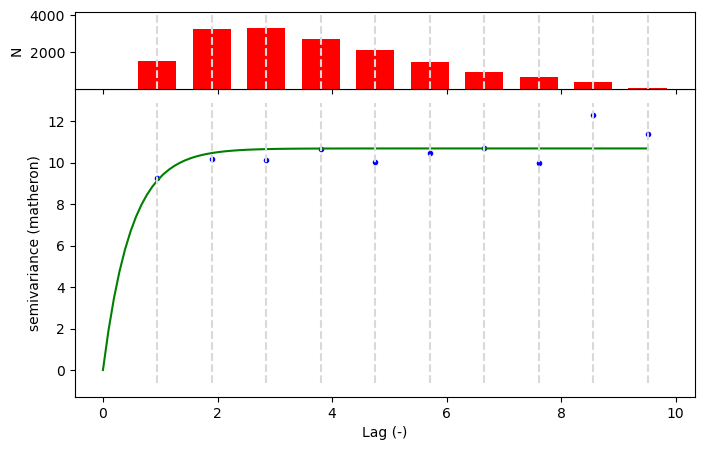

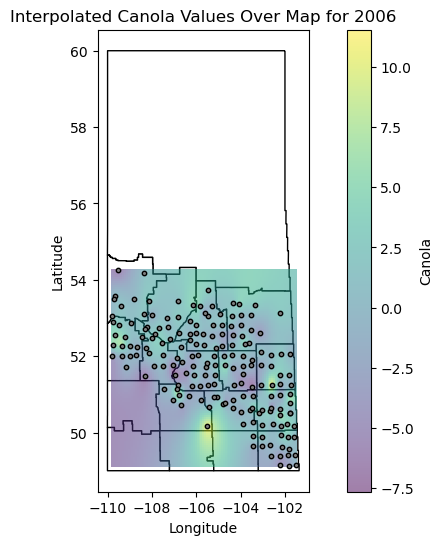

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


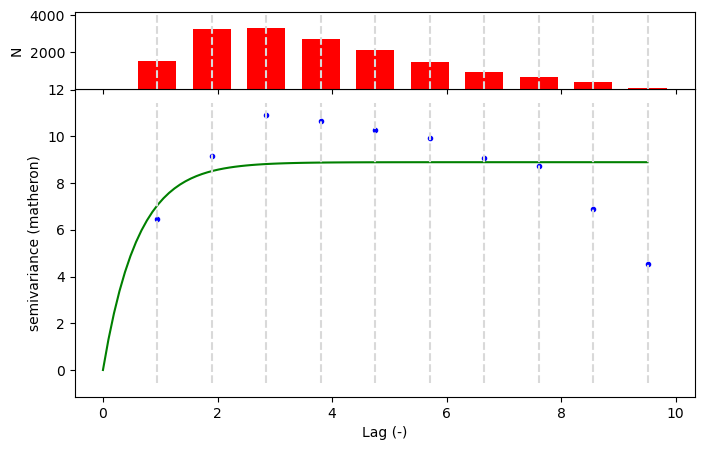

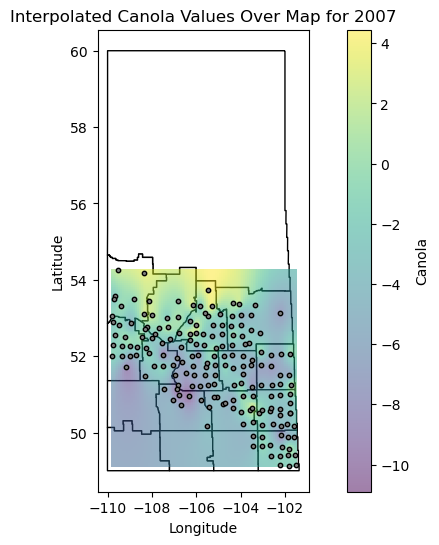

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


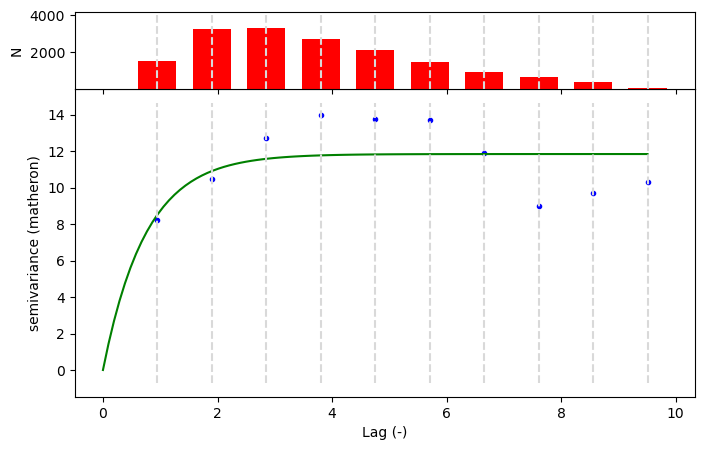

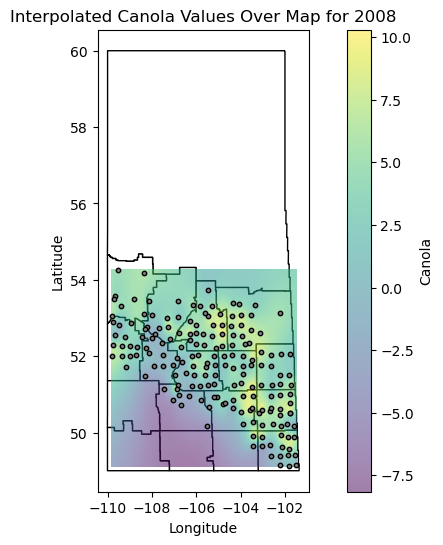

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


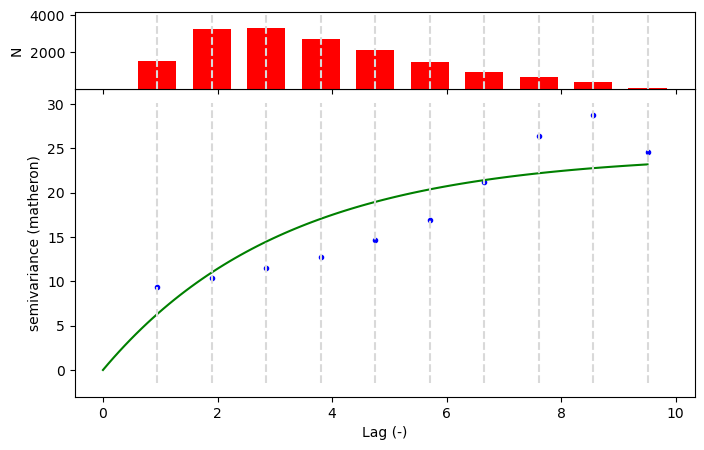

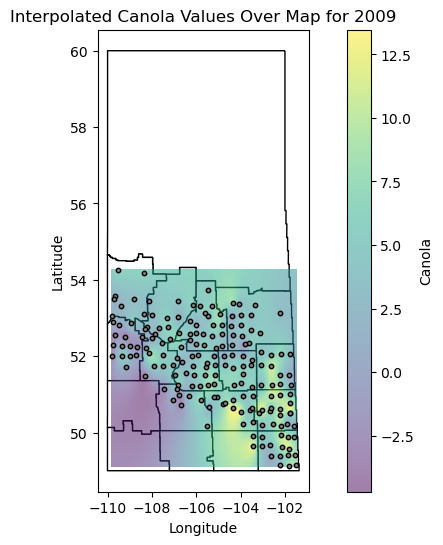

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


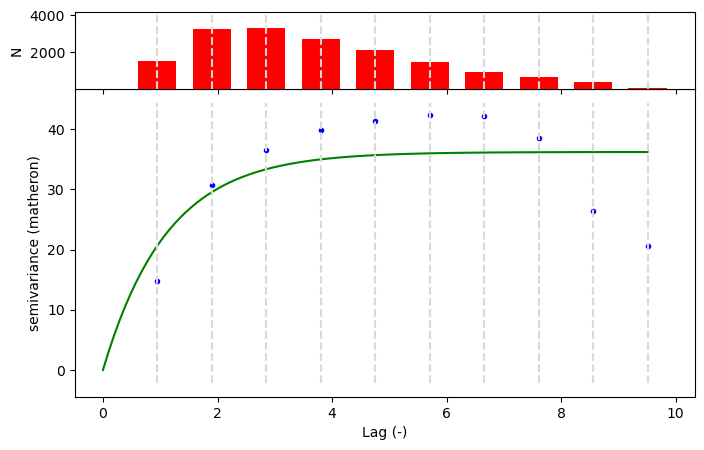

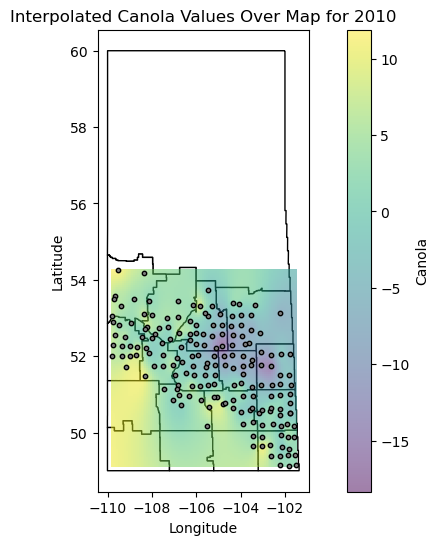

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


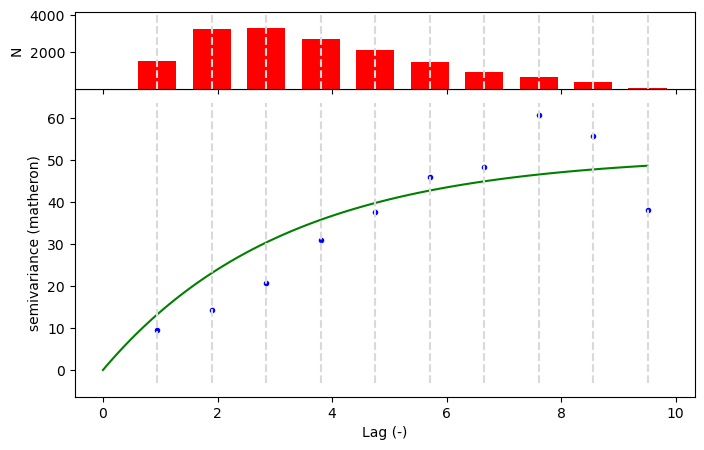

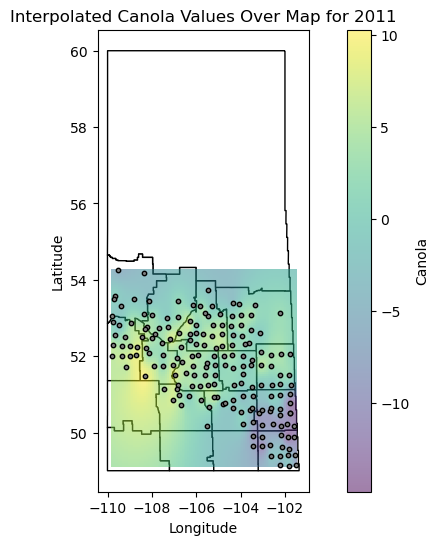

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


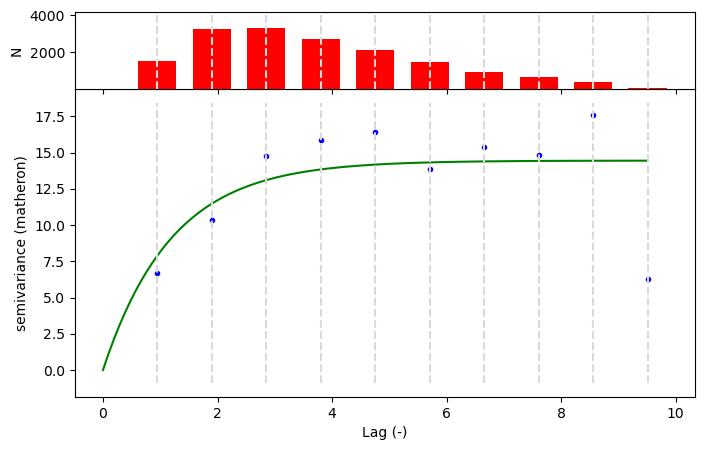

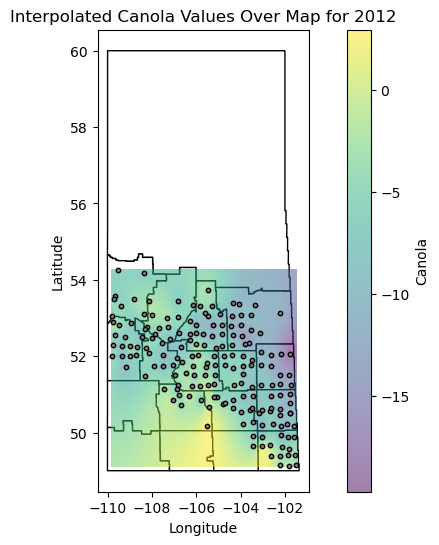

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


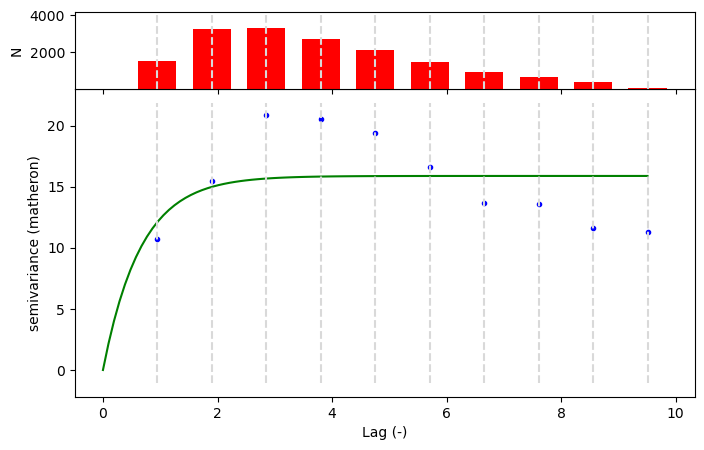

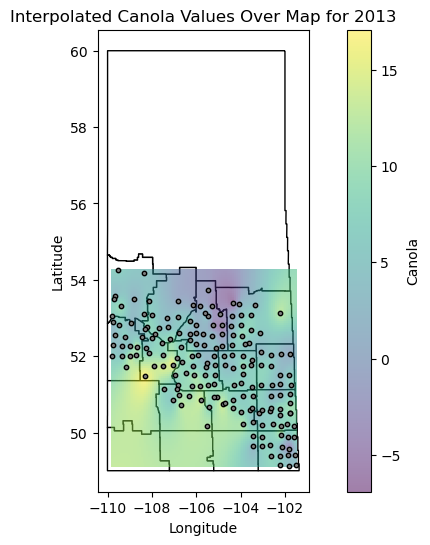

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


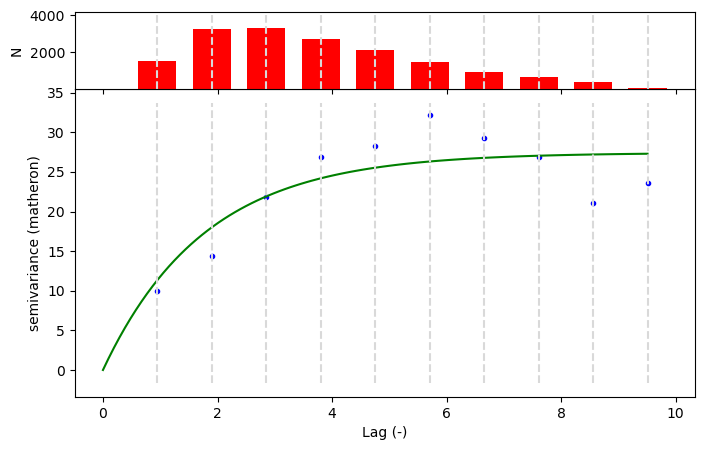

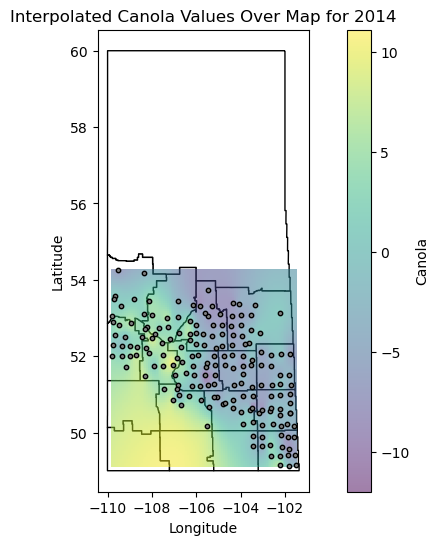

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


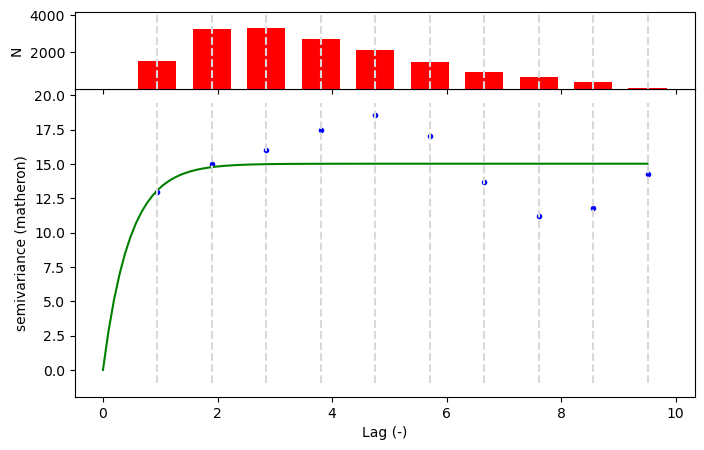

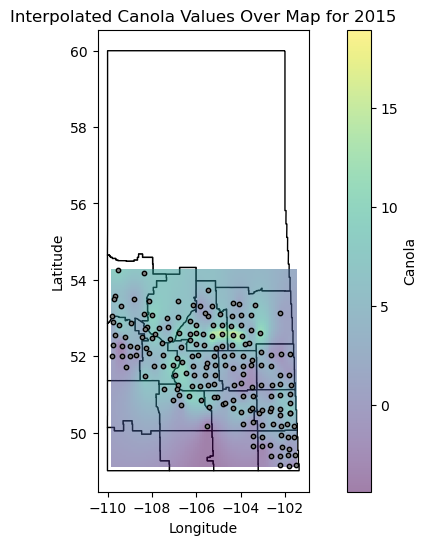

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


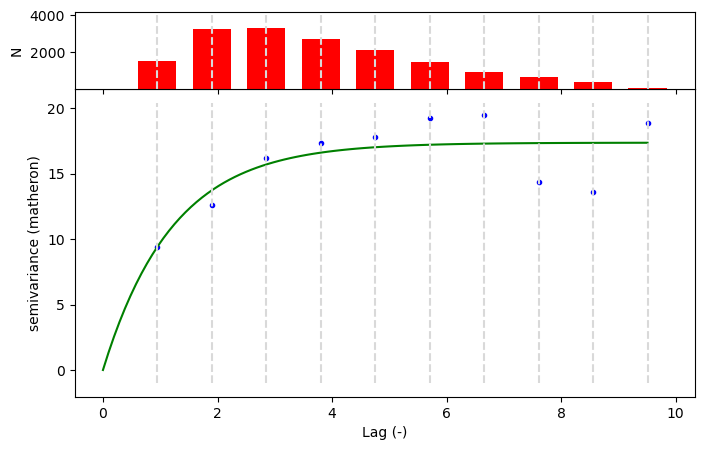

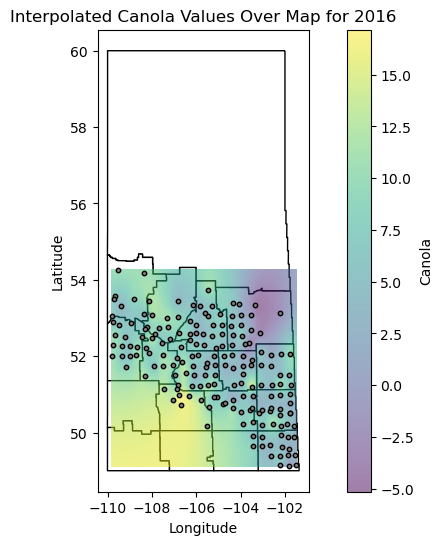

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


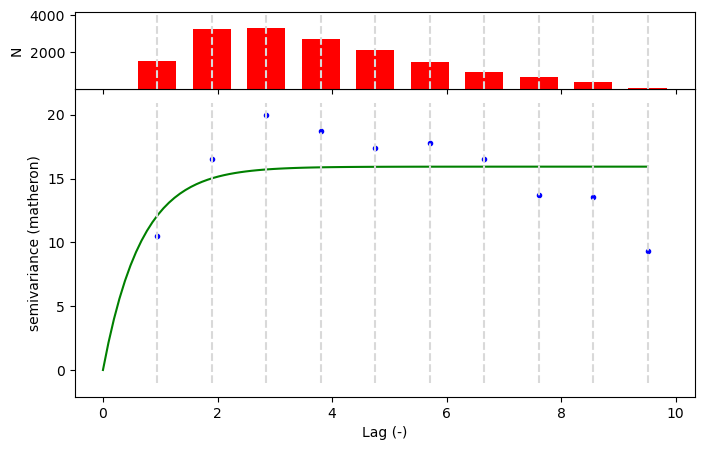

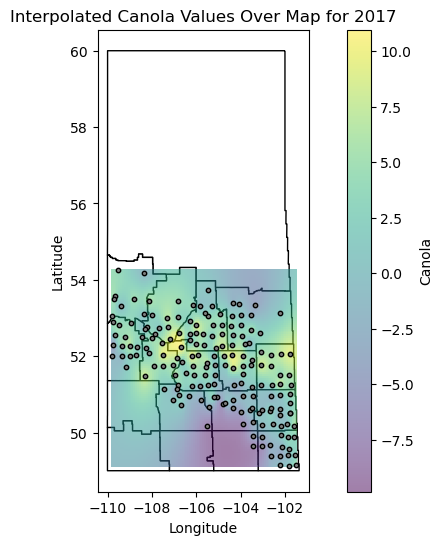

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


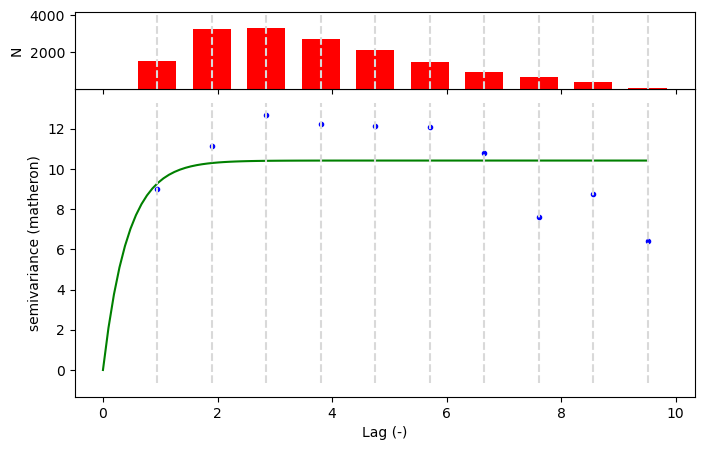

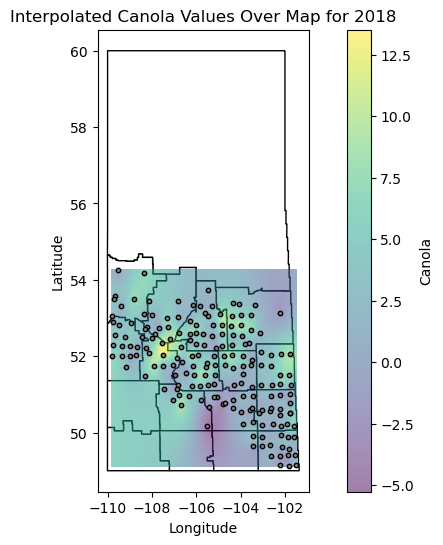

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


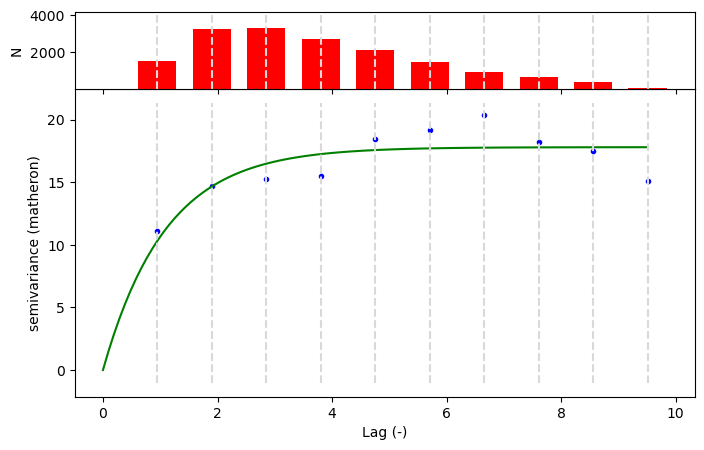

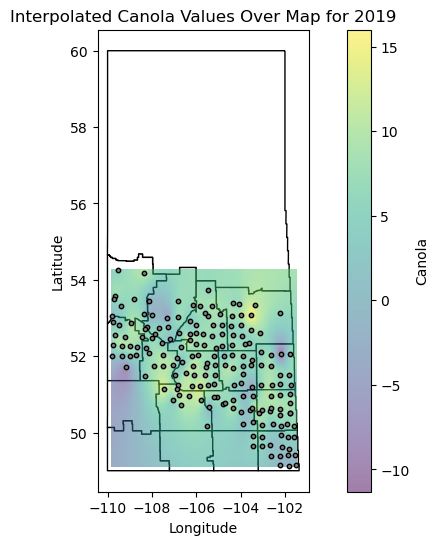

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


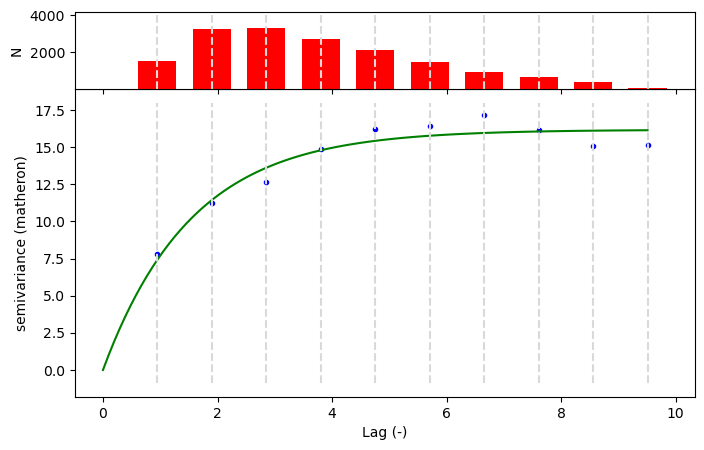

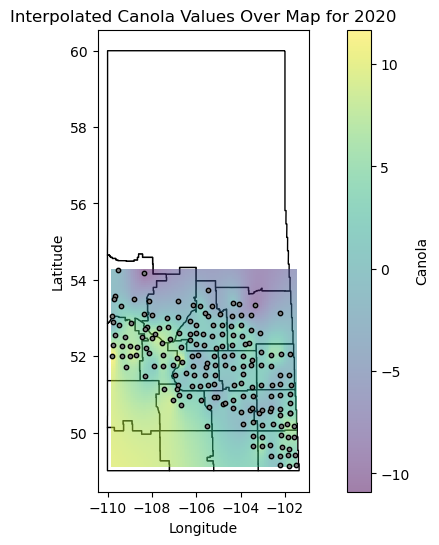

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


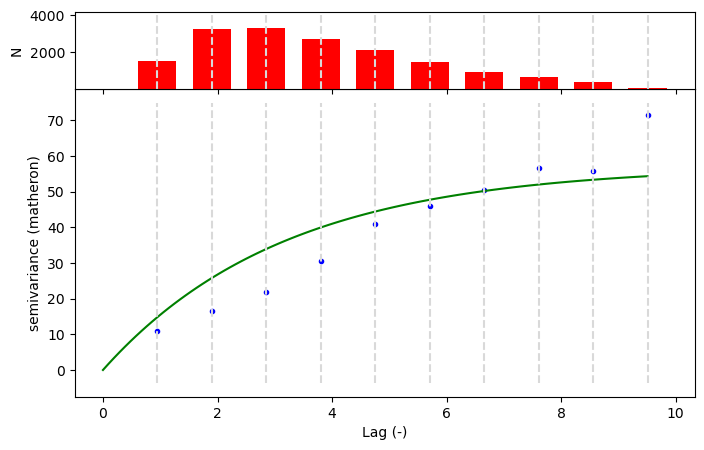

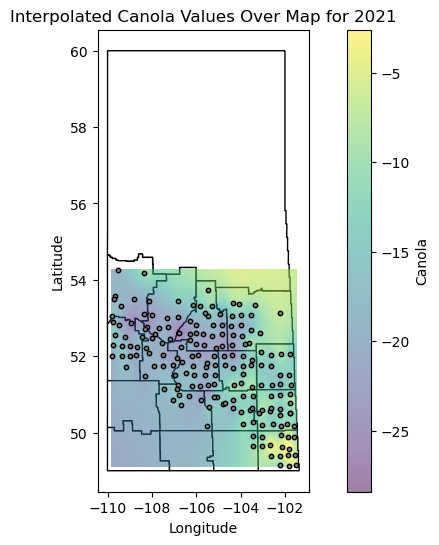

C:\Users\maris\anaconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


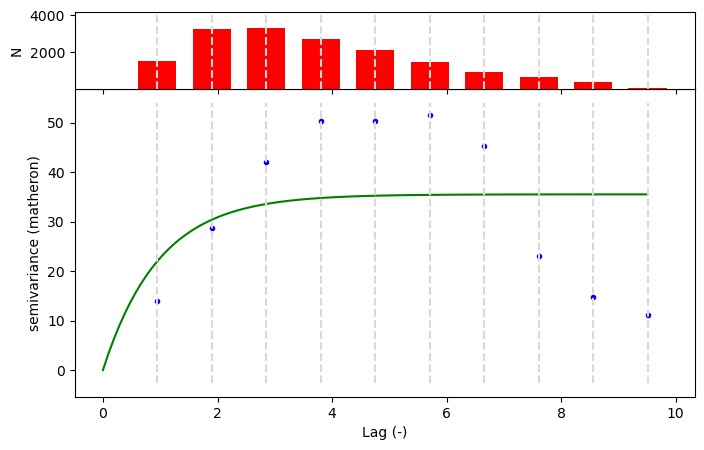

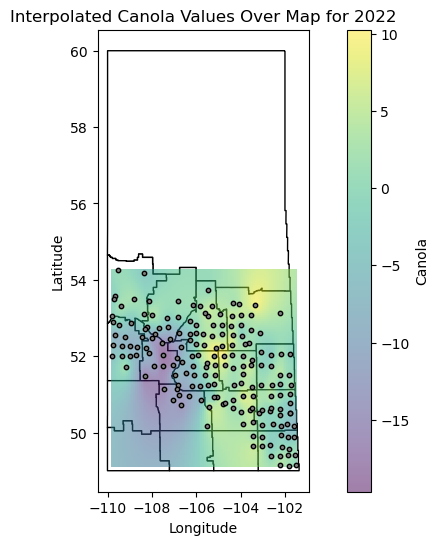

In [27]:
# plot the Canola yield over all districts for every year  

# Load the shapefile
map_saskatchewan = gpd.read_file("C:/Users/maris/python_notebooks/XAI_TS_Forecasting/data/Saskatchewan_map.shp")

# Iterate over each year in feature_df
for year in feature_df.index.unique():
    # Filter the DataFrame for the current year
    current_year_df = feature_df.loc[year]

    # Create the GeoDataFrame for the current year
    geometry = [Point(xy) for xy in zip(current_year_df["Longitude"], current_year_df["Latitude"])]
    geo_df = gpd.GeoDataFrame(current_year_df, geometry=geometry)

    # Define the grid for interpolation
    lon_min, lon_max = geo_df['Longitude'].min(), geo_df['Longitude'].max()
    lat_min, lat_max = geo_df['Latitude'].min(), geo_df['Latitude'].max()
    lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 100),
                           np.linspace(lat_min, lat_max, 100))
    
    # Variogram 
    
    latitude = geo_df['Latitude'].values
    longitude = geo_df['Longitude'].values
    values = geo_df['Canola'].values

    # Combine latitude and longitude into a single Numpy array of coordinates
    coords = np.column_stack((latitude, longitude))
    
    V = skg.Variogram(coords, values, model='exponential', normalize=False)
    V.plot()

    #
    
    # Perform RBF interpolation
    rbf = Rbf(geo_df['Longitude'], geo_df['Latitude'], geo_df['Canola'], function='linear')
    di = rbf(lon, lat)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    map_saskatchewan.plot(ax=ax, color='white', edgecolor='black')
    c = ax.pcolormesh(lon, lat, di, shading='auto', cmap='viridis', alpha=0.5)
    scatter = ax.scatter(geo_df['Longitude'], geo_df['Latitude'], color='gray', edgecolor='black', s=10, label='Original Points')

    # Add colorbar
    fig.colorbar(c, ax=ax, label='Canola')

    # Customize the plot for the current year
    plt.title(f"Interpolated Canola Values Over Map for {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Show plot
    plt.show()

# The spatial correlation within one year is strongly visible but also differs a lot between the year, likely explainable
# through different features 

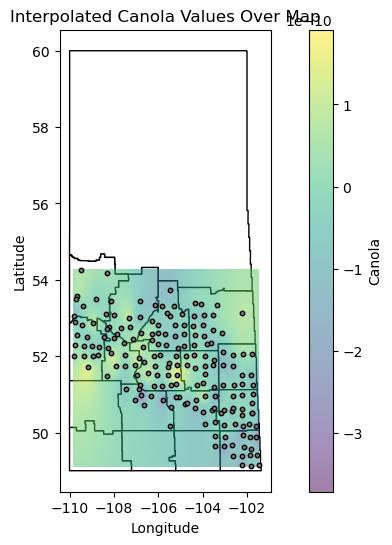

In [28]:
# sum over all years 

feature_df_sum = feature_df.groupby('region').agg({
    'Canola': 'sum',  
    'Latitude': 'first', 
    'Longitude': 'first' 
})

geometry = [Point(xy) for xy in zip(feature_df_sum["Longitude"], feature_df_sum["Latitude"])]
geo_df = gpd.GeoDataFrame(feature_df_sum, geometry=geometry)

# Load the shapefile
map_saskatchewan = gpd.read_file("C:/Users/maris/python_notebooks/XAI_TS_Forecasting/data/Saskatchewan_map.shp")


lon_min, lon_max = geo_df['Longitude'].min(), geo_df['Longitude'].max()
lat_min, lat_max = geo_df['Latitude'].min(), geo_df['Latitude'].max()
lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 100),
                       np.linspace(lat_min, lat_max, 100))

# Perform RBF interpolation
rbf = Rbf(geo_df['Longitude'], geo_df['Latitude'], geo_df['Canola'], function='linear')
di = rbf(lon, lat)


# Plot the shapefile as base
fig, ax = plt.subplots(figsize=(10, 6))
map_saskatchewan.plot(ax=ax, color='white', edgecolor='black')

# Plot the interpolated 'Canola' values
c = ax.pcolormesh(lon, lat, di, shading='auto', cmap='viridis', alpha=0.5)

# Add the original points over the interpolated surface
scatter = ax.scatter(geo_df['Longitude'], geo_df['Latitude'], color='gray', edgecolor='black', s=10, label='Original Points')  # s=10 makes the points smaller


# Add colorbar
fig.colorbar(c, ax=ax, label='Canola')

# Customize the plot
plt.title("Interpolated Canola Values Over Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()

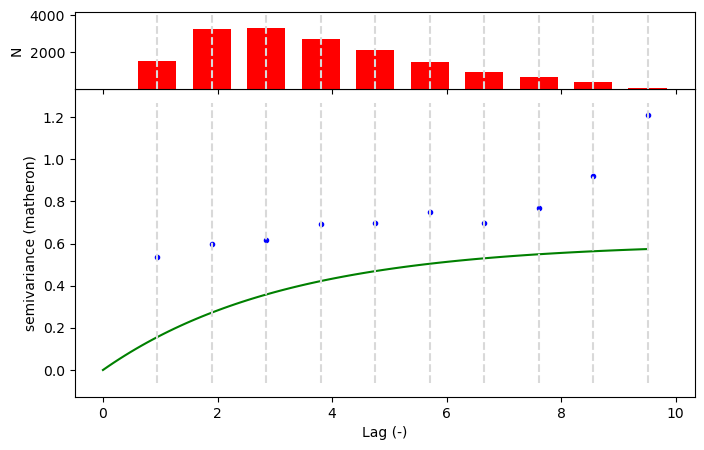

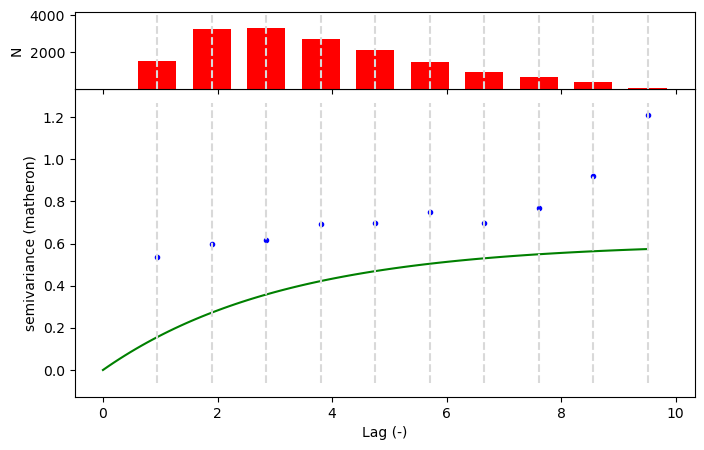

In [16]:
import numpy as np
from skgstat import Variogram
import matplotlib.pyplot as plt

# Assuming you already have latitude, longitude, and values from feature_df_sum
latitude = feature_df_sum['Latitude'].values
longitude = feature_df_sum['Longitude'].values
values = feature_df_sum['Canola'].values

# Combine latitude and longitude into a single Numpy array of coordinates
coords = np.column_stack((latitude, longitude))

#values = np.fromiter((z[c[0], c[1]] for c in coords), dtype=float)

V = skg.Variogram(coords, values, model='exponential', normalize=False)
V.plot()

# The values of the Experimental Variogram only slightly increase over distance, only the values for legs one and two 
# do show a strong increase but since there is low data for these lags they are likely to be inaccurate.
# The Theoretical Variogram does not fit the Experimental one very well 

In [ ]:
# Variogram 

latitude = feature_df_sum['Latitude'].values
longitude = feature_df_sum['Longitude'].values
values = feature_df_sum['Canola'].values 

# Create an Ordinary Kriging model with the data
OK = OrdinaryKriging(longitude, latitude, values, variogram_model='exponential')

# Generate variogram points
lag_distance = np.linspace(0, np.max(longitude) - np.min(longitude), num=100)
semivariance = OK.variogram_function(OK.lags, lag_distance)

# Plotting the experimental variogram
plt.figure(figsize=(10, 6))
plt.plot(OK.lags, OK.semivariance, 'ro', label='Experimental Variogram')
plt.plot(lag_distance, semivariance, 'k-', label='Theoretical Variogram')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.title('Variogram')
plt.legend()

plt.show()

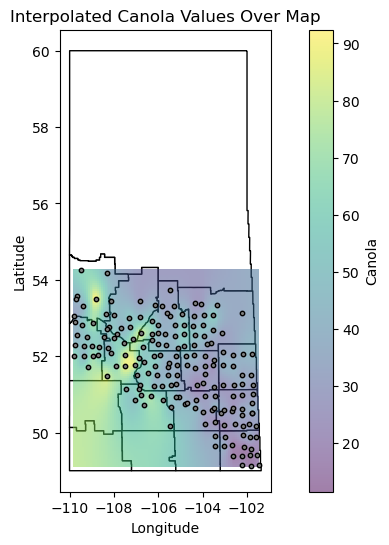

In [8]:
# variance over all years 

feature_df_sum = feature_df.groupby('region').agg({
    'Canola': 'var',  # Sum the values of the 'Canola' column
    'Latitude': 'first',  # Take the first 'Latitude' value
    'Longitude': 'first'  # Take the first 'Longitude' value
})

feature_df_sum

geometry = [Point(xy) for xy in zip(feature_df_sum["Longitude"], feature_df_sum["Latitude"])]
geo_df = gpd.GeoDataFrame(feature_df_sum, geometry=geometry)

# Load the shapefile
map_saskatchewan = gpd.read_file("C:/Users/maris/python_notebooks/XAI_TS_Forecasting/data/Saskatchewan_map.shp")


lon_min, lon_max = geo_df['Longitude'].min(), geo_df['Longitude'].max()
lat_min, lat_max = geo_df['Latitude'].min(), geo_df['Latitude'].max()
lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 100),
                       np.linspace(lat_min, lat_max, 100))

# Perform RBF interpolation
rbf = Rbf(geo_df['Longitude'], geo_df['Latitude'], geo_df['Canola'], function='linear')
di = rbf(lon, lat)


# Plot the shapefile as base
fig, ax = plt.subplots(figsize=(10, 6))
map_saskatchewan.plot(ax=ax, color='white', edgecolor='black')

# Plot the interpolated 'Canola' values
c = ax.pcolormesh(lon, lat, di, shading='auto', cmap='viridis', alpha=0.5)

# Add the original points over the interpolated surface
scatter = ax.scatter(geo_df['Longitude'], geo_df['Latitude'], color='gray', edgecolor='black', s=10, label='Original Points')  # s=10 makes the points smaller


# Add colorbar
fig.colorbar(c, ax=ax, label='Canola')

# Customize the plot
plt.title("Interpolated Canola Values Over Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()